In [7]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv("../processed_data/2018_Data_Accounts_Reverse.csv")
df = df.drop(columns=['Ticker'])
df.head()
df.describe()
display(df)


,CMCSA,SIRI,CZR,F,NKE,GM,LOW,FOXA,MAT,MIK,...,PRPL,RMBL,SGA,SHSP,SYPR,TKAT,UONE,VNCE,WINA,XELB
0,6.323475,0.030446,0.216274,10.992098,2.202412,10.049664,4.487542,0.341232,-0.058619,0.001460,...,-0.358534,-0.367710,-0.369949,-0.377479,-0.372563,-0.378199,-0.347661,-0.359470,-0.373659,-0.376286
1,-0.316696,-0.108048,0.061176,12.854323,1.530728,11.699469,3.857429,0.271216,-0.071216,-0.024487,...,-0.301043,-0.303703,-0.308225,-0.316172,-0.309429,-0.316463,-0.305365,-0.303067,-0.316273,-0.316451
2,16.416107,0.288030,0.420518,2.262109,2.501254,2.171589,3.648794,0.320963,-0.006632,0.051844,...,-0.305312,-0.323020,-0.319749,-0.322982,-0.323917,-0.324211,-0.269683,-0.303684,-0.313241,-0.319455
3,-0.158625,0.791809,-0.158625,-0.158625,-0.158625,-0.158625,-0.158625,-0.158625,-0.158625,-0.158625,...,-0.142465,-0.158625,-0.158625,-0.125472,-0.158625,-0.158625,-0.158625,-0.158625,-0.158625,-0.158625
4,17.261727,0.060087,0.271835,2.793410,2.822662,2.318617,3.617053,0.032407,0.255593,0.081539,...,-0.260539,-0.285551,-0.291969,-0.290590,-0.292209,-0.291735,-0.244763,-0.257098,-0.287993,-0.288419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,7.256458,0.919989,-0.098078,1.167930,5.339784,1.988695,3.798884,0.832965,-0.151853,-0.094441,...,-0.305004,-0.315644,-0.310897,-0.315197,-0.319687,-0.320130,-0.315699,-0.316220,-0.290164,-0.319493
58,9.706136,0.897186,0.505200,5.422933,4.032573,4.455106,3.506901,0.493709,-0.114403,-0.068070,...,-0.320011,-0.326700,-0.325908,-0.328350,-0.331860,-0.332647,-0.294470,-0.327465,-0.308479,-0.331265
59,-4.157145,-1.822499,-0.059603,12.746919,5.949899,-4.966444,0.220146,2.360806,0.500011,0.249440,...,-0.240575,-0.234379,-0.209054,-0.234064,-0.228805,-0.234363,-0.197830,-0.215203,-0.231966,-0.234695
60,0.272457,0.101756,1.295726,0.155944,0.359933,-0.039324,0.265534,-0.272463,0.369385,-0.937697,...,0.555614,-1.626023,-0.344355,-0.453805,-0.607241,-0.732742,-0.315203,0.862381,0.166098,0.181333


In [10]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++')
kmeans.fit(df)

KMeans()

In [12]:
kmeans.inertia_

5383.04102222471

C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWar

Text(0, 0.5, 'Inertia')

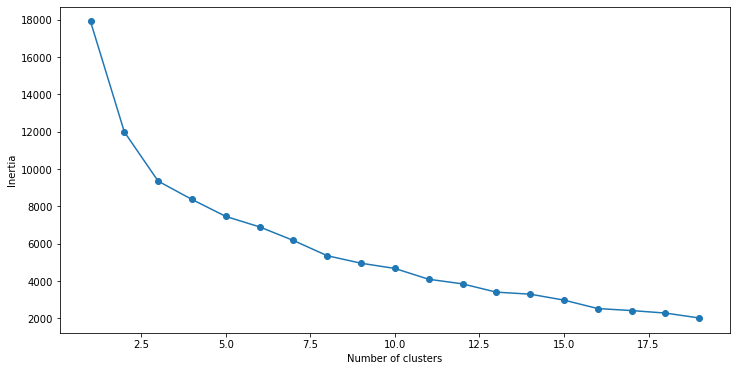

In [13]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [14]:
numclus = 8
kmeans = KMeans(n_jobs = -1, n_clusters = numclus, init = 'k-means++')
kmeans.fit(df)
pred = kmeans.predict(df)

C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [15]:
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    18
2    15
6     8
3     8
1     5
4     4
5     3
7     1
Name: cluster, dtype: int64

KeyError: 0